In [145]:
import matplotlib.pyplot as plt # plotting library
import mne
import h5py
import numpy as np 
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import glob
import random
import os
import math
import time


In [170]:
import time
import calendar
# time = time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))
current_GMT = time.gmtime()

time_stamp = calendar.timegm(current_GMT)
time_stamp

1672817449

In [147]:
import glob
train_path = r'C:\EEG_project\EEG-model-training-\code\train_set\*'
train_files = glob.glob(train_path)
test_path = r'C:\EEG_project\EEG-model-training-\code\test_set\*'
test_files = glob.glob(test_path)

In [148]:
print(len(train_files))
print(len(test_files))

16743
10708


In [ ]:
# preprocess training
for i in range(232):
    traindata = glob.glob(r'C:\segments_test\*.set')
    epochs = mne.io.read_epochs_eeglab(traindata[i])
    traineeg = epochs.get_data()
    #print(traineeg.shape)
    split = traineeg.shape[0]//2
    newtraineeg = np.array_split(traineeg,split)
    for x in range(split):
        if x == 0 and len(newtraineeg[x])%2 != 0:
            newtraineeg[x]=np.delete(newtraineeg[x], 0, axis=0)
        proeeg = newtraineeg[x][:,0:16,0:1200]
        np.save('./train_set/i'+str(i)+'x'+str(x)+'_trainingset.npy',proeeg)
        #print(proeeg.shape)

In [86]:
# preprcess testing
for j in range(272):
    testdata = glob.glob(r'C:\segments\*.set')
    if j != 227:
        epochs = mne.io.read_epochs_eeglab(testdata[j])
        testeeg = epochs.get_data()
        print(testeeg.shape)
        split = testeeg.shape[0]//2
        newtesteeg = np.array_split(testeeg,split)
        for y in range(split):
            if y == 0 and len(newtesteeg[y])%2 != 0:
                newtesteeg[y]=np.delete(newtesteeg[y], 0, axis=0)
            proeeg = newtesteeg[y][:,0:16,0:1200]
            np.save('./test_set/j'+str(j)+'y'+str(y)+'_testingset.npy',proeeg)
        print(proeeg.shape)


Extracting parameters from C:\segments\100_Skateboard_NP_CCW_Corrected_Standard.set...
Not setting metadata
174 matching events found
No baseline correction applied
0 projection items activated
Ready.
(174, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\100_Skateboard_NP_CCW_Corrected_Target.set...
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Ready.
(49, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\100_Skateboard_NP_CW_Corrected_Standard.set...
Not setting metadata
181 matching events found
No baseline correction applied
0 projection items activated
Ready.
(181, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\100_Skateboard_NP_CW_Corrected_Target.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.
(46, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\100_Skateboard_P_CCW_Corrected_Standard.set...


Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Ready.
(192, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\104_Skateboard_P_CCW_Corrected_Target.set...
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Ready.
(45, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\104_Skateboard_P_CW_Corrected_Standard.set...
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Ready.
(160, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\104_Skateboard_P_CW_Corrected_Target.set...
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Ready.
(40, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\106_Skateboard_NP_CCW_Corrected_Standard.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projectio

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Ready.
(30, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\110_Skateboard_NP_CCW_Corrected_Target.set...
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Ready.
(9, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\110_Skateboard_NP_CW_Corrected_Standard.set...
Not setting metadata
13 matching events found
No baseline correction applied
0 projection items activated
Ready.
(13, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\110_Skateboard_NP_CW_Corrected_Target.set...
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Ready.
(6, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\110_Skateboard_P_CCW_Corrected_Standard.set...
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items

12 matching events found
No baseline correction applied
0 projection items activated
Ready.
(12, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\114_Skateboard_P_CCW_Corrected_Target.set...
Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Ready.
(3, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\114_Skateboard_P_CW_Corrected_Standard.set...
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Ready.
(9, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\114_Skateboard_P_CW_Corrected_Target.set...
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Ready.
(2, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\115_Skateboard_NP_CCW_Corrected_Standard.set...
Not setting metadata
78 matching events found
No baseline correction applied
0 projection items activated
Ready.
(78, 18

No baseline correction applied
0 projection items activated
Ready.
(177, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\119_Skateboard_NP_CCW_Corrected_Target.set...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.
(47, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\119_Skateboard_NP_CW_Corrected_Standard.set...
Not setting metadata
188 matching events found
No baseline correction applied
0 projection items activated
Ready.
(188, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\119_Skateboard_NP_CW_Corrected_Target.set...
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Ready.
(49, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\119_Skateboard_P_CCW_Corrected_Standard.set...
Not setting metadata
171 matching events found
No baseline correction applied
0 projection items activated
Ready.
(171, 18, 1200)
(2, 

0 projection items activated
Ready.
(58, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\123_Skateboard_P_CCW_Corrected_Target.set...
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Ready.
(25, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\123_Skateboard_P_CW_Corrected_Standard.set...
Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Ready.
(86, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\123_Skateboard_P_CW_Corrected_Target.set...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Ready.
(20, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\124_Skateboard_NP_CCW_Corrected_Standard.set...
Not setting metadata
68 matching events found
No baseline correction applied
0 projection items activated
Ready.
(68, 18, 1200)
(2, 16, 1200)
Extracting parameters from C

0 projection items activated
Ready.
(8, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\128_Skateboard_NP_CCW_Corrected_Target.set...
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Ready.
(2, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\128_Skateboard_NP_CW_Corrected_Standard.set...
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Ready.
(21, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\128_Skateboard_NP_CW_Corrected_Target.set...
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Ready.
(2, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\128_Skateboard_P_CCW_Corrected_Standard.set...
Not setting metadata
198 matching events found
No baseline correction applied
0 projection items activated
Ready.
(198, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:

Ready.
(40, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\132_Skateboard_P_CW_Corrected_Standard.set...
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Ready.
(72, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\132_Skateboard_P_CW_Corrected_Target.set...
Not setting metadata
13 matching events found
No baseline correction applied
0 projection items activated
Ready.
(13, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\133_Skateboard_NP_CCW_Corrected_Standard.set...
Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
Ready.
(197, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\133_Skateboard_NP_CCW_Corrected_Target.set...
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Ready.
(49, 18, 1200)
(2, 16, 1200)
Extracting parameters from C:\segments\133_Skateboard_

In [149]:
from torch.utils.data import Dataset

class EEGDataset(Dataset):
    def __init__(self, file_names, img_dir='./test_set/', transform=None, target_transform=None):
        self.file_names = file_names
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, idx):
#         path = r'C:\Users\jerem\eeg_proj\eeg_env\test_set\*'
#         try:
        traineeg = np.load(self.img_dir+self.file_names[idx])
#             testeeg = traineeg
#         except:
#             print ('error', self.file_names[idx])
        traineeg = traineeg*(10**6)
        return traineeg, traineeg

In [150]:
filenames1 = glob.glob('./train_set/*.npy')
filenames2 = glob.glob('./test_set/*.npy')
print(len(filenames1))
print(len(filenames2))
training_generator = DataLoader(EEGDataset(filenames1, img_dir=''),  batch_size=256)
testing_generator = DataLoader(EEGDataset(filenames2, img_dir=''),  batch_size=256)
for x,y in training_generator:
    print (x.shape, y.shape)
    print(type(x),type(y))
    break
for x,y in testing_generator:
    print (x.shape, y.shape)
    print(type(x),type(y))
    break

16743
10708
torch.Size([256, 2, 16, 1200]) torch.Size([256, 2, 16, 1200])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([256, 2, 16, 1200]) torch.Size([256, 2, 16, 1200])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [151]:
#data debugging

filenames2 = glob.glob('./test_set/*.npy')

testing_generator = DataLoader(EEGDataset(filenames2, img_dir=''),  batch_size=1)

for x,y,fn in testing_generator:
    try: 
        print (fn)
    except:
        print ('error', fn)

ValueError: not enough values to unpack (expected 3, got 2)

In [155]:
class Encoder(nn.Module):
    
    def __init__(self, encoded_space_dim,fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.encoder_cnn = nn.Sequential( #three convolutional layers
            nn.Conv2d(2, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=0),
            nn.ReLU(True)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)
        ### Linear section
        self.encoder_lin = nn.Sequential( #two fully connected layers
            nn.Linear(4768, 128),
            nn.ReLU(True),
            nn.Linear(128, encoded_space_dim)
        )
        
    def forward(self, x):
        x = x.float()
        x = self.encoder_cnn(x)
#         print ('encode', x.shape)
        x = self.flatten(x)
        #x = x.view(-1,3 * 3 * 32)
        x = self.encoder_lin(x)
        
        return x

In [156]:
class Decoder(nn.Module): #decoder has the same architecture with the encoder but in inverse order
    
    def __init__(self, encoded_space_dim,fc2_input_dim):
        super().__init__()
        self.decoder_lin = nn.Sequential(
            nn.Linear(encoded_space_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 4768),
            nn.ReLU(True)
        )

        self.unflatten = nn.Unflatten(dim=1, 
        unflattened_size=(32, 1, 149))

#         self.encoder_cnn = nn.Sequential( #three convolutional layers
#             nn.Conv2d(2, 8, 3, stride=2, padding=1),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16, 8, 2, stride=2, output_padding=0),
#             nn.BatchNorm2d(16),
#             nn.ReLU(True),
#             nn.Conv2d(16, 32, 3, stride=2, padding=0),
#             nn.ReLU(True)
#         )
        
        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, 
            stride=2, output_padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 2, stride=2, output_padding=0),
#             nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 2, 2, stride=2, output_padding=0)
        )
        
    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
#         print ('decode', x.shape)
        x = self.decoder_conv(x)
#         x = torch.sigmoid(x)
        return x

In [157]:
### Define the loss function
loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
lr= 0.001

### Set the random seed for reproducible results
torch.manual_seed(0)

### Initialize the two networks
d = 1024

#model = Autoencoder(encoded_space_dim=encoded_space_dim)
encoder = Encoder(encoded_space_dim=d,fc2_input_dim=128)
decoder = Decoder(encoded_space_dim=d,fc2_input_dim=128)
params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
]

optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-05)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# Move both the encoder and the decoder to the selected device
encoder = encoder.to(device)
decoder = decoder.to(device)



Selected device: cuda


In [158]:
optimizer = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-05)

for eeg, _ in training_generator: # with "_" we just ignore the labels (the second element of the dataloader tuple)
    eeg = eeg.type(torch.FloatTensor)
    eeg = eeg.to(device)
    encoded_data = encoder(eeg)
    decoded_data = decoder(encoded_data)
    loss = loss_fn(decoded_data, eeg)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    break

In [159]:
### Training function
def train_epoch(encoder, decoder, loss_fn, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    encoder.train()
    decoder.train()
    train_loss = []
    #sklearn.model_selection.train_test_split(*arrays, test_size=1, train_size=136, random_state=None, shuffle=True, stratify=None)
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for eeg, _ in dataloader: # with "_" we just ignore the labels (the second element of the dataloader tuple)
#       for i in tqdm(range(256)): #show the process of training
        # Move tensor to the proper device
        eeg = eeg.type(torch.FloatTensor)
        eeg = eeg.to(device)
        #print (eeg.shape)
        # Encode data
        encoded_data = encoder(eeg)
        # Decode data
        decoded_data = decoder(encoded_data)
        # Evaluate loss
#         print (eeg.dtype)
#         print (decoded_data.dtype)
        loss = loss_fn(decoded_data, eeg)
#         loss = tf.cast(loss, tf.float32)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
#         print('\t training {}/{}'.format(i + 1, len(dataset)))
#         print('\t partial train loss (single batch): %f' % (loss.data))
        train_loss.append(loss.detach().cpu().numpy())
    return np.mean(train_loss)

In [181]:
### Testing function
def test_epoch(encoder, decoder, dataloader, loss_fn):
    # Set evaluation mode for encoder and decoder
    encoder.eval()
    decoder.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_out = []
        conc_label = []
        val_loss = []
        for eeg, _ in dataloader:
            '''for i in tqdm(range(272)):'''
            # Move tensor to the proper device
            eeg = eeg.to(device)
            # Encode data
            encoded_data = encoder(eeg)
            # Decode data
            decoded_data = decoder(encoded_data)
            # Append the network output and the original image to the lists
            conc_out.append(decoded_data.cpu())
            conc_label.append(eeg.cpu())
            # Create a single tensor with all the values in the lists
            conc_out = torch.cat(conc_out)
            conc_label = torch.cat(conc_label) 
            # Evaluate global loss
            #print (conc_out.shape)
            #print (conc_label.shape)
            sum_loss = loss_fn(conc_out, conc_label)
            val_loss.append(sum_loss.detach().cpu().numpy())
            #print(val_loss)
            conc_out = []
            conc_label = []
        #print('\t val_loss{}'.format(val_loss))
    return np.mean(val_loss)

In [172]:
def save_weight(val_loss):
    torch.save(encoder,str(time_stamp)+'saveEncoder.pt') 
    torch.save(decoder,str(time_stamp)+'saveDecoder.pt')

In [182]:
torch.load('1672817449saveDecoder.pt')
torch.load('1672817449saveEncoder.pt')

Encoder(
  (encoder_cnn): Sequential(
    (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder_lin): Sequential(
    (0): Linear(in_features=4768, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=1024, bias=True)
  )
)

In [183]:
num_epochs = 1000
diz_loss = {'train_loss':[],'val_loss':[]}

min_val_loss = math.inf

for epoch in range(num_epochs):
    torch.cuda.empty_cache()
    train_loss =train_epoch(encoder, decoder, loss_fn, training_generator, optim)
    val_loss = test_epoch(encoder,decoder,testing_generator,loss_fn)
    if val_loss < min_val_loss:
        save_weight(val_loss)
        min_val_loss = val_loss
    print('\n EPOCH {}/{} \t train loss {} \t val loss {}'.format(epoch + 1, num_epochs,train_loss,val_loss))
    diz_loss['train_loss'].append(train_loss)
    diz_loss['val_loss'].append(val_loss)
    #plot_ae_outputs(encoder,decoder,n=10)


 EPOCH 1/1000 	 train loss 121.66725158691406 	 val loss 18656030.16917053

 EPOCH 2/1000 	 train loss 121.62358856201172 	 val loss 18687065.79781538

 EPOCH 3/1000 	 train loss 121.71207427978516 	 val loss 19248608.052923795

 EPOCH 4/1000 	 train loss 121.82072448730469 	 val loss 19981354.758709233

 EPOCH 5/1000 	 train loss 122.00407409667969 	 val loss 20170064.725026168

 EPOCH 6/1000 	 train loss 121.9495849609375 	 val loss 19504307.069803543

 EPOCH 7/1000 	 train loss 122.53462982177734 	 val loss 21180999.828503046

 EPOCH 8/1000 	 train loss 122.77348327636719 	 val loss 19170872.742756873

 EPOCH 9/1000 	 train loss 122.92205047607422 	 val loss 19980801.254307296

 EPOCH 10/1000 	 train loss 122.57762145996094 	 val loss 19156679.87487203

 EPOCH 11/1000 	 train loss 123.57575988769531 	 val loss 19628093.64825511

 EPOCH 12/1000 	 train loss 123.14009094238281 	 val loss 18105353.07590695

 EPOCH 13/1000 	 train loss 122.22920227050781 	 val loss 18245244.59330488

 

KeyboardInterrupt: 

In [269]:
def plot_figure(input_np, output_np):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
    for i in range(16):
        ax1.plot(input_np[0, i, :]+.5*i, label='ground_truth', color='b')
        ax2.plot(input_np[1, i, :]+.5*i, label='ground_truth', color='b')
        ax1.plot(output_np[0, i, :]+.5*i, label='predict', color='r')
        ax2.plot(output_np[1, i, :]+.5*i, label='predict', color='r')
    plt.show()

In [268]:
ground_truth

array([[[ 0.29296904,  0.34148245,  0.39097378, ...,  0.50155611,
          0.38553565,  0.26524501],
        [ 0.6364028 ,  0.70101848,  0.76367383, ...,  2.53391552,
          2.3899929 ,  2.24169254],
        [-0.88851624, -0.96641893, -1.0338316 , ...,  1.08180799,
          1.18550882,  1.27979088],
        ...,
        [ 0.68896971,  0.70842628,  0.72611318, ...,  0.87397947,
          0.74406724,  0.6130312 ],
        [ 0.30030336,  0.28787899,  0.27956426, ..., -0.06444434,
         -0.16182562, -0.26026316],
        [ 0.21935275,  0.18249221,  0.142116  , ..., -0.0930872 ,
         -0.13020279, -0.1688128 ]],

       [[ 0.12255398,  0.14940621,  0.17360126, ...,  0.36511343,
          0.44438162,  0.52828479],
        [-0.56782498, -0.49809804, -0.42367172, ...,  0.77518759,
          0.93087368,  1.0907155 ],
        [ 0.51044421,  0.54825721,  0.57870169, ..., -0.95420628,
         -0.88388338, -0.80090485],
        ...,
        [ 0.18752692,  0.23249266,  0.2755893 , ..., -

In [267]:
output_img

array([[[-0.12950188, -0.1211859 , -0.12934071, ..., -0.15913117,
         -0.1663683 , -0.15770417],
        [ 0.1324336 ,  0.13052034,  0.13179463, ...,  0.04363024,
          0.04427475,  0.04259175],
        [-0.03628528, -0.02720642, -0.03597915, ...,  0.11330628,
          0.10427719,  0.11351275],
        ...,
        [ 0.04612738,  0.04363024,  0.04427475, ...,  0.04363024,
          0.04427475,  0.04259175],
        [ 0.10338956,  0.11330628,  0.10427719, ...,  0.11330628,
          0.10427719,  0.11351275],
        [ 0.084521  ,  0.08306462,  0.08406287, ...,  0.08306462,
          0.08406287,  0.08306974]],

       [[-0.24315643, -0.24626052, -0.24455678, ..., -0.27084196,
         -0.27132285, -0.2742039 ],
        [-0.15174735, -0.15232074, -0.149809  , ..., -0.14465666,
         -0.13805091, -0.13836992],
        [-0.17556977, -0.17836273, -0.17558134, ..., -0.07401228,
         -0.07137072, -0.07339454],
        ...,
        [-0.14367008, -0.14465666, -0.13805091, ..., -

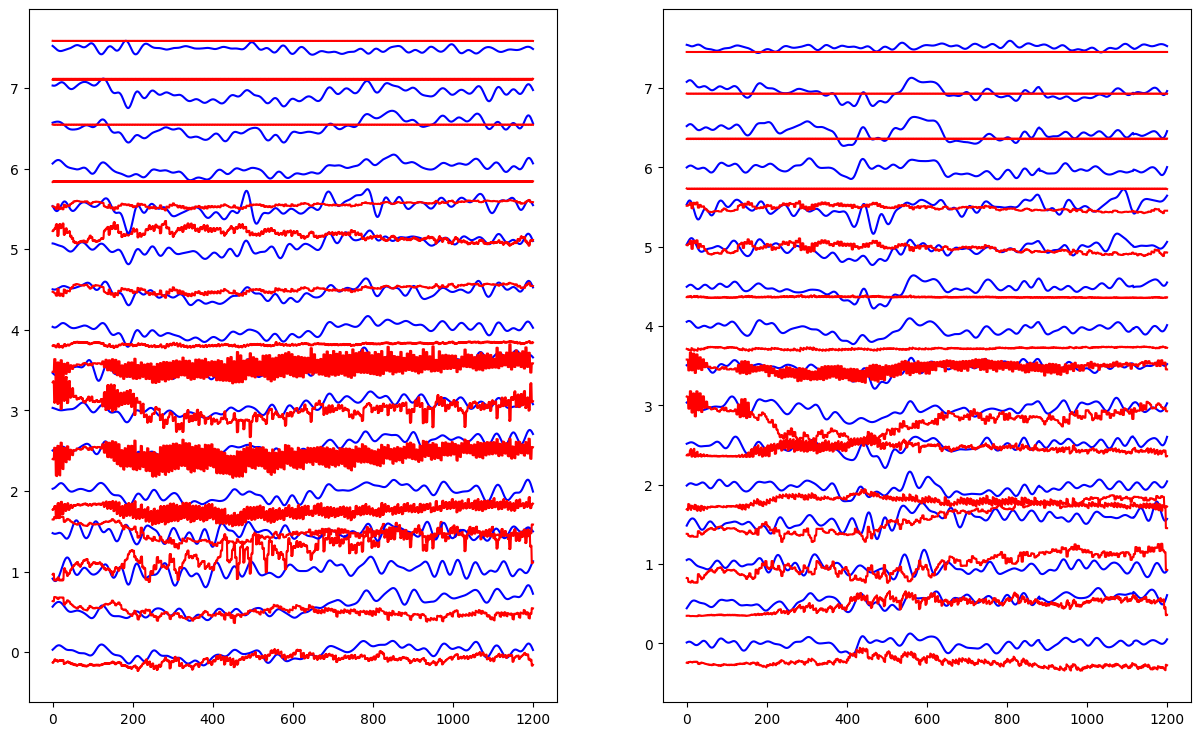

In [270]:
import numpy as np 

input_np = glob.glob('./train_set/*.npy')
for i in range(len(input_np)):
    ground_truth = np.load(input_np[i])#original
    output = torch.tensor(ground_truth).unsqueeze(0).to(device)
    encoder.eval()
    decoder.eval()
    with torch.no_grad():
        output_img = decoder(encoder(output))
    output_img = output_img.cpu().detach().numpy()
    #print(type(output_img))
    output_img = output_img.squeeze()
    ground_truth = ground_truth*10**4
#     print (i)
#     print (output_img)
    plot_figure(ground_truth,output_img)
    break

In [ ]:
#plot how the reconstruction losses decrease over the epochs
plt.figure(figsize=(10,8))
plt.semilogy(diz_loss['train_loss'], label='Train')
plt.semilogy(diz_loss['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()

In [ ]:
# Generate new samples from the random latent code
def show_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

encoder.eval()
decoder.eval()

with torch.no_grad():
    # calculate mean and std of latent code, generated takining in test images as inputs 
    images, labels = iter(test_loader).next()
    images = images.to(device)
    latent = encoder(images)
    latent = latent.cpu()

    mean = latent.mean(dim=0)
    print(mean)
    std = (latent - mean).pow(2).mean(dim=0).sqrt()
    print(std)

    # sample latent vectors from the normal distribution
    latent = torch.randn(128, d)*std + mean

    # reconstruct images from the random latent vectors
    latent = latent.to(device)
    img_recon = decoder(latent)
    img_recon = img_recon.cpu()

    fig, ax = plt.subplots(figsize=(20, 8.5))
    show_image(torchvision.utils.make_grid(img_recon[:100],10,5))
    plt.show()

In [ ]:
#observe dynamic visualization to see the latent space learned by the autoencoder:

#create the encoded samples using the test set
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    encoder.eval()
    with torch.no_grad():
        encoded_img  = encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

In [ ]:
#plot the latent space representation using plotly express library
import plotly.express as px

px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', 
           color=encoded_samples.label.astype(str), opacity=0.7)

In [ ]:
# visualize the latent code in a 2d space
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(encoded_samples.drop(['label'],axis=1))
fig = px.scatter(tsne_results, x=0, y=1,
                 color=encoded_samples.label.astype(str),
                 labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()